# Visualisasi dengan Geopandas (output shp)

Jalankan file ini di jupyter dengan cara mengubah kernel ke `maps`. Jika kernel `maps` belum ada, lakukan langkah-langkah berikut ini:

1. Buka Anaconda Prompt
2. Buat environment baru: `conda create -n maps python=3.9`
3. Aktifkan environment `maps`: `conda activate maps`
4. Install `geopandas`: `pip install geopandas`
5. Install `matplotlib`: `pip install matplotlib`
6. Install `ipykernel`: `pip install ipykernel`
7. Daftarkan ke dalam kernel: `python -m ipykernel install --name "maps" --display-name "maps"`

## 1. Import packages

In [38]:
import os
import pickle
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Read Indonesia shapefile

In [24]:
shp_coast = gpd.read_file('./ne_10m_land/ne_10m_land.shp')

### 1.2 Output save function

In [41]:
def save_to_output_dir(gdf, name_file):
    savedir = os.path.join(os.getcwd(), 'output', name_file.split('.')[0])
    os.makedirs(savedir, exist_ok=True)
    gdf.to_file(os.path.join(savedir, name_file))

## 2. Reading from 3.2

/var/folders/nm/jd9hzrq57k19r9vm8lk_3c4r0000gn/T/ipykernel_59482/1766348802.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(os.path.join(savedir, name_file))


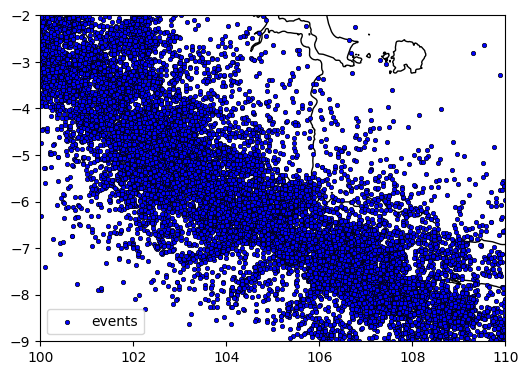

In [75]:
# membuka data pkl
with open('dict_catalogue.pkl', 'rb') as file:
    dict_catalogue = pickle.load(file)

# merubah data pkl ke data pandas dan geopandas -> simpan ke format shp
# dict_catalogue
df = pd.DataFrame.from_dict(dict_catalogue)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
save_to_output_dir(gdf, "dict_catalogue.shp")

# plot basemap
ax = shp_coast.plot(color='white', edgecolor='black', linewidth=1, figsize=(6,6))

# plot dict_catalogue
ax.scatter(df.longitude, df.latitude, 
           c='blue', s=10, edgecolors='black', linewidths=0.5, 
           label='events')

# tambahkan legenda, set batas koordinat, show
ax.legend()
ax.set_ylim((-9, -2))
ax.set_xlim((100, 110))
plt.show()

# warning menunjukkan bahwa nama sigmaMagnitude menjadi sigmaMagni (melewati batas maksimum karakter)
# sehingga warning dapat diabaikan

## 2. Reading from 4.1

/var/folders/nm/jd9hzrq57k19r9vm8lk_3c4r0000gn/T/ipykernel_59482/1766348802.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(os.path.join(savedir, name_file))
/var/folders/nm/jd9hzrq57k19r9vm8lk_3c4r0000gn/T/ipykernel_59482/1766348802.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(os.path.join(savedir, name_file))


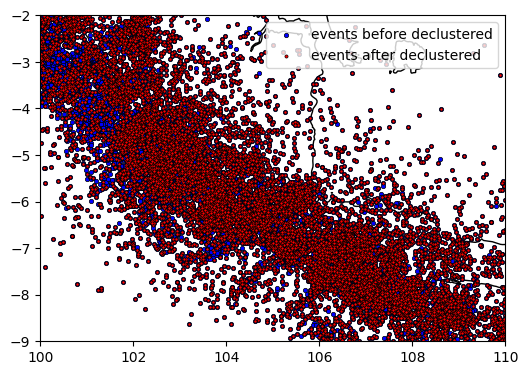

In [76]:
# membuka data pkl
with open('dict_catalogue.pkl', 'rb') as file:
    dict_catalogue = pickle.load(file)
    
with open('dict_catalogue_declustered.pkl', 'rb') as file:
    dict_catalogue_declustered = pickle.load(file)

# merubah data pkl ke data pandas dan geopandas -> simpan ke format shp
# dict_catalogue
df = pd.DataFrame.from_dict(dict_catalogue)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
save_to_output_dir(gdf, "dict_catalogue.shp")

# dict_catalogue_declustered
df_c = pd.DataFrame.from_dict(dict_catalogue_declustered)
gdf_c = gpd.GeoDataFrame(df_c, geometry=gpd.points_from_xy(df_c.longitude, df_c.latitude))
save_to_output_dir(gdf_c, "dict_catalogue_declustered.shp")

# plot basemap
ax = shp_coast.plot(color='white', edgecolor='black', linewidth=1, figsize=(6,6))

# plot dict_catalogue
ax.scatter(df.longitude, df.latitude, 
           c='blue', s=10, edgecolors='black', linewidths=0.5, 
           label='events before declustered')

# plot dict_catalogue_declustered
ax.scatter(df_c.longitude, df_c.latitude, 
           c='red', s=5, edgecolors='black', linewidths=0.5, 
           label='events after declustered')

# tambahkan legenda, set batas koordinat, show
ax.legend()
ax.set_ylim((-9, -2))
ax.set_xlim((100, 110))
plt.show()

# warning menunjukkan bahwa nama sigmaMagnitude menjadi sigmaMagni (melewati batas maksimum karakter)
# sehingga warning dapat diabaikan

## 2. Reading from 5.1.2.1

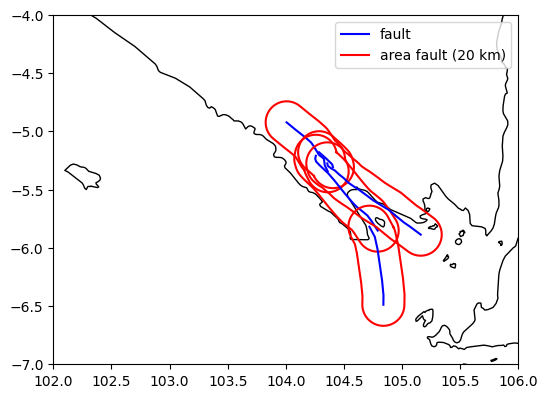

In [77]:
with open('dict_faults.pkl', 'rb') as file:
    dict_faults = pickle.load(file)

# plot basemap
ax = shp_coast.plot(color='white', edgecolor='black', linewidth=1, figsize=(6,6))

# plot faults dan area faults
for i, fault, poly in zip(range(len(dict_faults["faults"])), dict_faults["faults"], dict_faults["polygon_faults"]):
    ax.plot(fault[:,0], fault[:,1], color="blue", label="fault" if i == 0 else None)
    ax.plot(poly[0], poly[1], color="red", label="area fault (20 km)" if i == 0 else None)

# tambahkan legenda, set batas koordinat, show
ax.legend()
ax.set_ylim((-7, -4))
ax.set_xlim((102, 106))
plt.show()

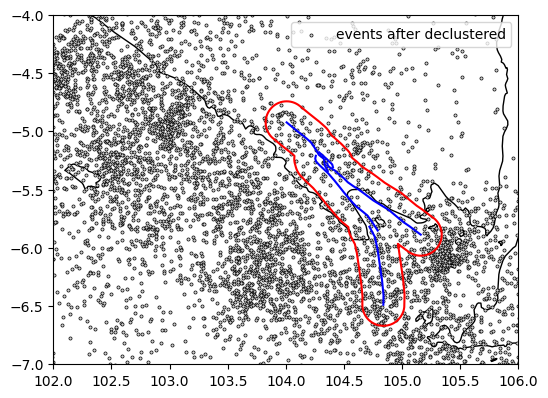

In [78]:
with open('dict_catalogue_declustered.pkl', 'rb') as file:
    dict_catalogue_declustered = pickle.load(file)

with open('dict_faults.pkl', 'rb') as file:
    dict_faults = pickle.load(file)
    
# merubah data pkl ke data pandas dan geopandas -> simpan ke format shp
# merged area
polygon_geom = Polygon(zip(dict_faults["merge_lon"], dict_faults["merge_lat"]))
gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[polygon_geom])
save_to_output_dir(gdf, "merged_area_faults.shp")
    
# plot basemap
ax = shp_coast.plot(color='white', edgecolor='black', linewidth=1, figsize=(6,6))

# plot dict_catalogue_declustered
ax.scatter(dict_catalogue_declustered['longitude'], 
           dict_catalogue_declustered['latitude'], 
           c='lightgrey', s=5, edgecolors='black', linewidths=0.5, 
           label='events after declustered')

# plot faults dan area faults (merged area)
for fault in dict_faults["faults"]:
    ax.plot(fault[:,0], fault[:,1], color="blue")
ax.plot(dict_faults["merge_lon"], dict_faults["merge_lat"], color="red")

# tambahkan legenda, set batas koordinat, show
ax.legend()
ax.set_ylim((-7, -4))
ax.set_xlim((102, 106))
plt.show()

## 3. Reading from 5.1.3.1

/var/folders/nm/jd9hzrq57k19r9vm8lk_3c4r0000gn/T/ipykernel_59482/1766348802.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(os.path.join(savedir, name_file))


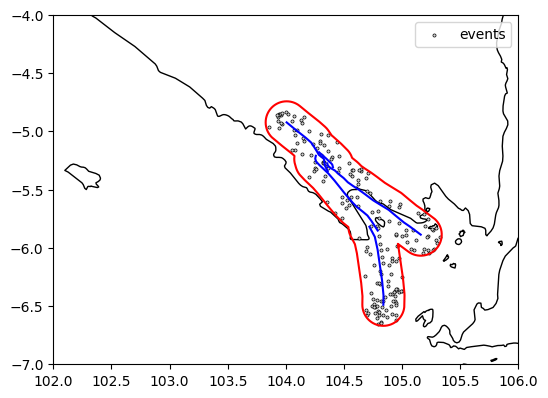

In [79]:
with open('dict_catalogue_FaultArea_Depth20km.pkl', 'rb') as file:
    dict_catalogue_FaultArea_Depth20km = pickle.load(file)

with open('dict_faults.pkl', 'rb') as file:
    dict_faults = pickle.load(file)
    
# merubah data pkl ke data pandas dan geopandas -> simpan ke format shp
# dict_catalogue_FaultArea_Depth20km
df = pd.DataFrame.from_dict(dict_catalogue_FaultArea_Depth20km)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
save_to_output_dir(gdf, "dict_catalogue_FaultArea_Depth20km.shp")

# plot basemap
ax = shp_coast.plot(color='white', edgecolor='black', linewidth=1, figsize=(6,6))

# plot dict_catalogue_declustered
ax.scatter(dict_catalogue_FaultArea_Depth20km['longitude'], 
           dict_catalogue_FaultArea_Depth20km['latitude'], 
           c='lightgrey', s=5, edgecolors='black', linewidths=0.5, 
           label='events')

# plot faults dan area faults (merged area)
for fault in dict_faults["faults"]:
    ax.plot(fault[:,0], fault[:,1], color="blue")
ax.plot(dict_faults["merge_lon"], dict_faults["merge_lat"], color="red")

# tambahkan legenda, set batas koordinat, show
ax.legend()
ax.set_ylim((-7, -4))
ax.set_xlim((102, 106))
plt.show()

## 3. Reading from 5.2.2.1

/var/folders/nm/jd9hzrq57k19r9vm8lk_3c4r0000gn/T/ipykernel_59482/1766348802.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(os.path.join(savedir, name_file))


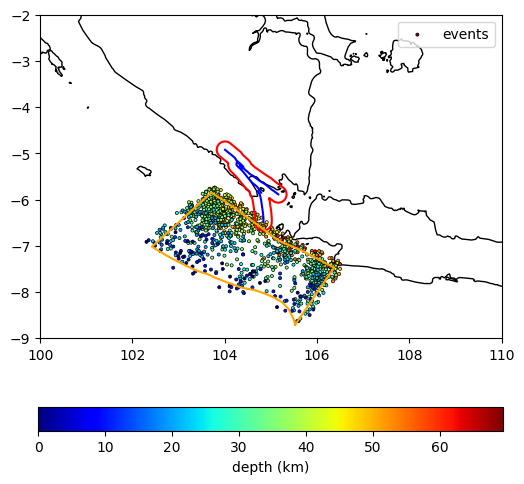

In [89]:
with open('dict_catalogue_megathrust.pkl', 'rb') as file:
    dict_catalogue_megathrust = pickle.load(file)

with open('dict_megathrust.pkl', 'rb') as file:
    dict_megathrust = pickle.load(file)

with open('dict_faults.pkl', 'rb') as file:
    dict_faults = pickle.load(file)
    
# merubah data pkl ke data pandas dan geopandas -> simpan ke format shp
# dict_catalogue_megathrust
df = pd.DataFrame.from_dict(dict_catalogue_megathrust)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
save_to_output_dir(gdf, "dict_catalogue_megathrust.shp")

# plot basemap
ax = shp_coast.plot(color='white', edgecolor='black', linewidth=1, figsize=(6,6))

# plot dict_catalogue_declustered
im = ax.scatter(dict_catalogue_megathrust['longitude'], 
           dict_catalogue_megathrust['latitude'],
           c=dict_catalogue_megathrust['depth'],
           cmap='jet',
           s=5, edgecolors='black', linewidths=0.5, 
           label='events')

# plot faults dan area faults (merged area)
for fault in dict_faults["faults"]:
    ax.plot(fault[:,0], fault[:,1], color="blue")
ax.plot(dict_faults["merge_lon"], dict_faults["merge_lat"], color="red")

# plot megathrust
ax.plot(dict_megathrust["lon"], dict_megathrust["lat"], color="orange")

# tambahkan legenda, set batas koordinat, show
ax.legend()
plt.colorbar(im, location='bottom', label='depth (km)')
ax.set_ylim((-9, -2))
ax.set_xlim((100, 110))
plt.show()

## 3. Reading from 5.3.3

/var/folders/nm/jd9hzrq57k19r9vm8lk_3c4r0000gn/T/ipykernel_59482/1766348802.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(os.path.join(savedir, name_file))


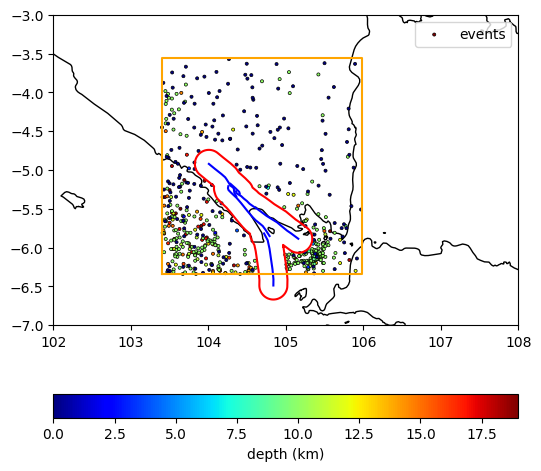

In [91]:
with open('dict_catalogue_shallowbackground.pkl', 'rb') as file:
    dict_catalogue_shallowbackground = pickle.load(file)

with open('dict_shallowbackground.pkl', 'rb') as file:
    dict_shallowbackground = pickle.load(file)

with open('dict_faults.pkl', 'rb') as file:
    dict_faults = pickle.load(file)

# merubah data pkl ke data pandas dan geopandas -> simpan ke format shp
# dict_catalogue_shallowbackground
df = pd.DataFrame.from_dict(dict_catalogue_shallowbackground)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
save_to_output_dir(gdf, "dict_catalogue_shallowbackground.shp")

# plot basemap
ax = shp_coast.plot(color='white', edgecolor='black', linewidth=1, figsize=(6,6))

# plot dict_catalogue_shallowbackground
im = ax.scatter(dict_catalogue_shallowbackground['longitude'], 
           dict_catalogue_shallowbackground['latitude'],
           c=dict_catalogue_shallowbackground['depth'],
           cmap='jet',
           s=5, edgecolors='black', linewidths=0.5, 
           label='events')

# plot faults dan area faults (merged area)
for fault in dict_faults["faults"]:
    ax.plot(fault[:,0], fault[:,1], color="blue")
ax.plot(dict_faults["merge_lon"], dict_faults["merge_lat"], color="red")

# plot boundary
ax.plot(dict_shallowbackground["lon"], dict_shallowbackground["lat"], color="orange")

# tambahkan legenda, set batas koordinat, show
ax.legend()
plt.colorbar(im, location='bottom', label='depth (km)')
ax.set_ylim((-7, -3))
ax.set_xlim((102, 108))
plt.show()